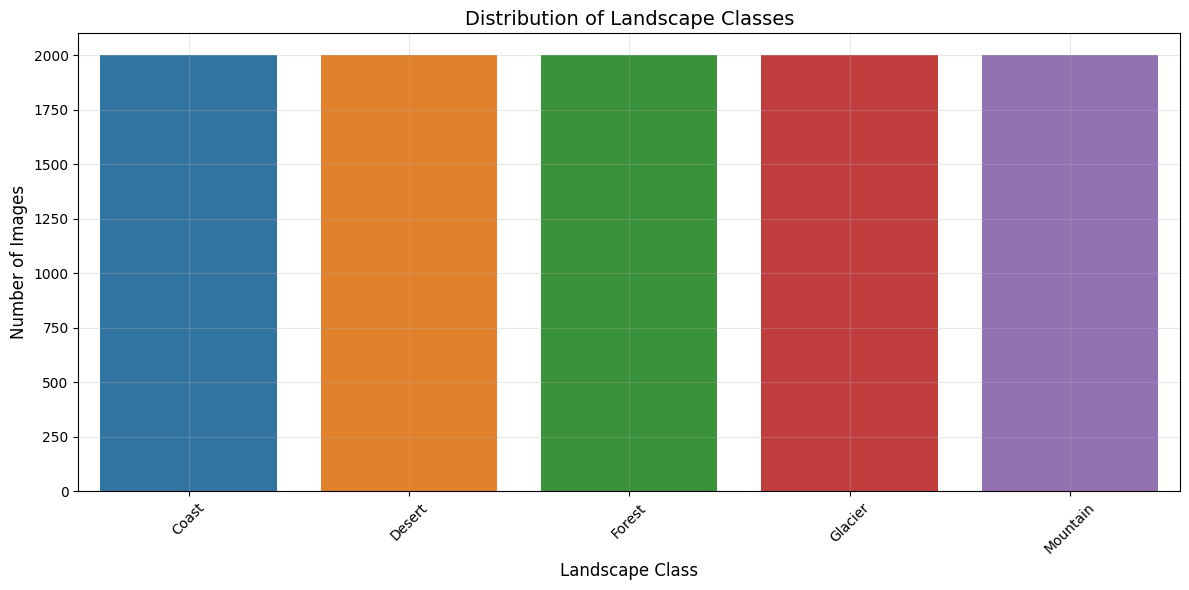


Class Distribution:
Coast: 2000 images (20.0%)
Desert: 2000 images (20.0%)
Forest: 2000 images (20.0%)
Glacier: 2000 images (20.0%)
Mountain: 2000 images (20.0%)


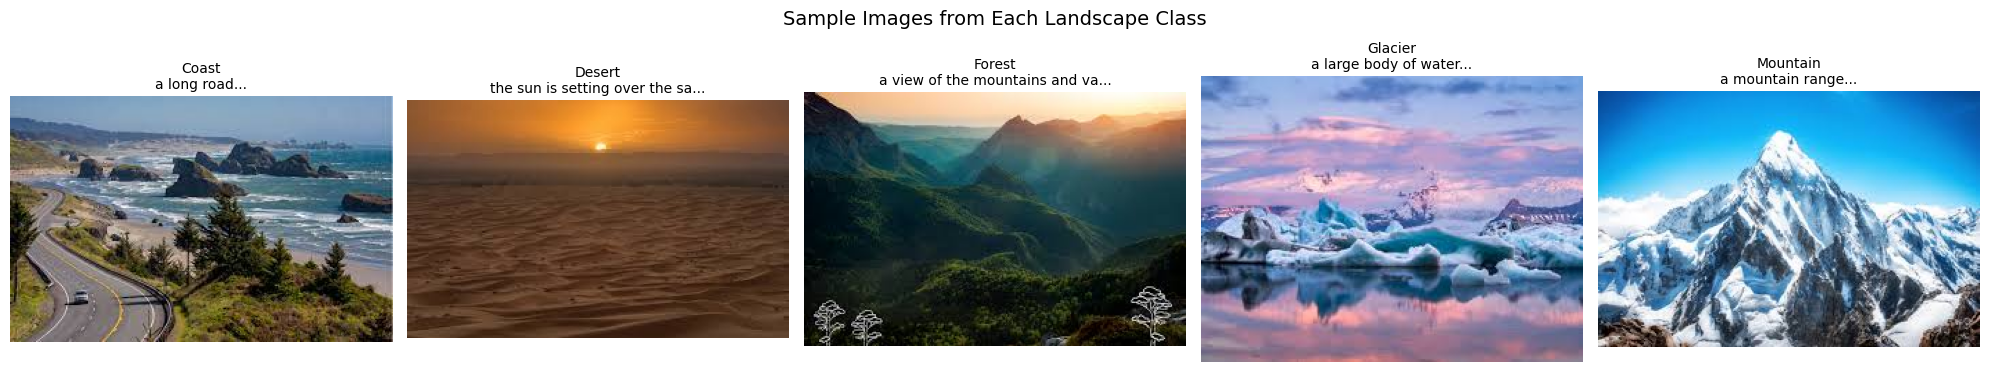


Class Imbalance Metrics:
Mean samples per class: 2000.0


In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import os
from collections import Counter

# Load JSON file
with open('/kaggle/input/combined-landscape-captions/combined_landscape_captions.json', 'r') as f:
    data = json.load(f)

# More robust class extraction
def get_class(path):
    try:
        if 'Training Data' in path:
            # Extract class from training data path
            return path.split('Training Data/')[1].split('/')[0]
        elif 'Testing Data' in path:
            # Extract class from testing data path
            return path.split('Testing Data/')[1].split('/')[0]
        else:
            # For paths that don't match expected format
            return "Unknown"
    except:
        return "Unknown"

# Create DataFrame
df = pd.DataFrame(list(data.items()), columns=['path', 'caption'])
df['class'] = df['path'].apply(get_class)

# Remove Unknown class if present
df = df[df['class'] != "Unknown"]

# Plot class distribution
plt.figure(figsize=(12, 6))
class_counts = df['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Landscape Classes', fontsize=14)
plt.xlabel('Landscape Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print distribution statistics
print("\nClass Distribution:")
for class_name, count in class_counts.items():
    percentage = count/len(df)*100
    print(f"{class_name}: {count} images ({percentage:.1f}%)")

# Show sample images
classes = df['class'].unique()
n_classes = len(classes)
fig, axes = plt.subplots(1, n_classes, figsize=(20, 4))
fig.suptitle('Sample Images from Each Landscape Class', fontsize=14)

for idx, class_name in enumerate(classes):
    # Get random sample from class
    sample = df[df['class'] == class_name].sample(n=1).iloc[0]
    
    try:
        # Load and display image
        img = Image.open(sample['path'])
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"{class_name}\n{sample['caption'][:30]}...", 
                          fontsize=10, pad=5)
    except Exception as e:
        print(f"Error loading image for class {class_name}: {e}")
        axes[idx].text(0.5, 0.5, 'Image load error', 
                      ha='center', va='center')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Calculate and print class imbalance metrics
print("\nClass Imbalance Metrics:")
mean_samples = class_counts.mean()
std_samples = class_counts.std()
print(f"Mean samples per class: {mean_samples:.1f}")